In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from SALib.analyze import sobol
import warnings
from ema_workbench.analysis import feature_scoring
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
    perform_experiments,
    Samplers,
    SequentialEvaluator,
)
# from dike_model_function import DikeNetwork 
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time
from ema_workbench.analysis import prim
from ema_workbench.em_framework.parameters import Constant

warnings.filterwarnings("ignore")

In [2]:
import numpy as np


In [3]:
dele = []
dike_model_1, planning_steps = get_model_for_problem_formulation(3)
for x in dike_model_1.uncertainties:
    if x.name not in ["A.1_pfail","A.2_pfail","A.3_pfail","A.4_pfail","A.5_pfail"]:
        dele.append(x.name)
for i in dele:
    dike_model_1.uncertainties.__delitem__(i)


dike_model_1.constants.extend(Constant("discount rate 0",2.5))
dike_model_1.constants.extend(Constant("discount rate 1",2.5))
dike_model_1.constants.extend(Constant("discount rate 2",2.5))

dike_model_1.constants.extend(Constant('A.0_ID flood wave shape',17))

dike_model_1.constants.extend(Constant('A.1_Bmax',190))
dike_model_1.constants.extend(Constant('A.1_Brate',1.5))

dike_model_1.constants.extend(Constant('A.2_Bmax',190))
dike_model_1.constants.extend(Constant('A.2_Brate',1.5))

dike_model_1.constants.extend(Constant('A.3_Bmax',190))
dike_model_1.constants.extend(Constant('A.3_Brate',1.5))

dike_model_1.constants.extend(Constant('A.4_Bmax',190))
dike_model_1.constants.extend(Constant('A.4_Brate',1.5))

dike_model_1.constants.extend(Constant('A.5_Bmax',190))
dike_model_1.constants.extend(Constant('A.5_Brate',1.5))

In [4]:
with MultiprocessingEvaluator(dike_model_1) as evaluator:
    results = evaluator.perform_experiments(scenarios=2000,policies=10,uncertainty_sampling=Samplers.LHS)

experiments, outcomes = results

100%|████████████████████████████████████| 20000/20000 [38:52<00:00,  8.58it/s]


In [5]:
# x = experiments
# 
# y = ((df_feature_importance_out["A.5_Expected Number of Deaths"] >
#       list(np.sort(df_feature_importance_out["A.5_Expected Number of Deaths"]))[
#           np.int64(0.90 * len(df_feature_importance_out["A.5_Expected Number of Deaths"]))])
#      | (df_feature_importance_out['A.5_Expected Annual Damage'] >
#         list(np.sort(df_feature_importance_out['A.5_Expected Annual Damage']))[
#             np.int64(0.9 * len(df_feature_importance_out['A.5_Expected Annual Damage']))])
#      )
# 
# prim_alg = prim.Prim(x, y, threshold=0.95)
# box1 = prim_alg.find_box()
# box1.show_tradeoff(annotated=True)
# plt.show()

NameError: name 'experiments_unc1' is not defined

In [ ]:
df_feature_importance_out

## LLLLLLLLLLLL

In [ ]:
# dike_model_1, planning_steps = get_model_for_problem_formulation(3)
# 
# zero_policy = {"DaysToThreat": 0}
# zero_policy.update({f"DikeIncrease {n}": 0 for n in planning_steps})
# zero_policy.update({f"RfR {n}": 0 for n in planning_steps})
# 
# pol0 = {}
# #
# for key in dike_model_1.levers:
#     s1, s2 = key.name.split("_")
#     pol0.update({key.name: zero_policy[s2]})
# 
# policy0 = Policy("Policy 0", **pol0)

In [ ]:
# dele = []
# for x in dike_model_1.uncertainties:
#     if x.name not in ["A.1_pfail","A.2_pfail","A.3_pfail","A.4_pfail","A.5_pfail"]:
#         dele.append(x.name)
# for i in dele:
#     dike_model_1.uncertainties.__delitem__(i)
# 
# 
# dike_model_1.constants.extend(Constant("discount rate 0",2.5))
# dike_model_1.constants.extend(Constant("discount rate 1",2.5))
# dike_model_1.constants.extend(Constant("discount rate 2",2.5))
# 
# dike_model_1.constants.extend(Constant('A.0_ID flood wave shape',17))
# 
# dike_model_1.constants.extend(Constant('A.1_Bmax',190))
# dike_model_1.constants.extend(Constant('A.1_Brate',1.5))
# 
# dike_model_1.constants.extend(Constant('A.2_Bmax',190))
# dike_model_1.constants.extend(Constant('A.2_Brate',1.5))
# 
# dike_model_1.constants.extend(Constant('A.3_Bmax',190))
# dike_model_1.constants.extend(Constant('A.3_Brate',1.5))
# 
# dike_model_1.constants.extend(Constant('A.4_Bmax',190))
# dike_model_1.constants.extend(Constant('A.4_Brate',1.5))
# 
# dike_model_1.constants.extend(Constant('A.5_Bmax',190))
# dike_model_1.constants.extend(Constant('A.5_Brate',1.5))


In [ ]:
# with MultiprocessingEvaluator(dike_model_1) as evaluator:
#     results = evaluator.perform_experiments(scenarios=250,policies=5,uncertainty_sampling=Samplers.LHS)
# 
# experiments, outcomes = results

## Preprocess data samples SOBOL

In [6]:
experiments_unc =experiments.iloc[:,0:5]

In [8]:
df =pd.DataFrame(outcomes)

In [9]:
df["Expected Number of Deaths"] = df["A.1_Expected Number of Deaths"] + df["A.2_Expected Number of Deaths"] + df[
    "A.3_Expected Number of Deaths"] + df["A.4_Expected Number of Deaths"] + df["A.5_Expected Number of Deaths"]
df["Expected Annual Damage"] = df["A.1_Expected Annual Damage"] + df["A.2_Expected Annual Damage"] + df["A.3_Expected Annual Damage"] + df["A.4_Expected Annual Damage"] + df["A.5_Expected Annual Damage"]

outcomes["Expected Number of Deaths"] = df["Expected Number of Deaths"]
outcomes["Expected Annual Damage"] = df["Expected Annual Damage"]

## Feature importance (not required but nice to know)

In [49]:

df_feature_importance_out = df[["Expected Annual Damage", "Expected Number of Deaths", "A.5_Expected Number of Deaths","A.5_Expected Annual Damage","Expected Evacuation Costs"]]


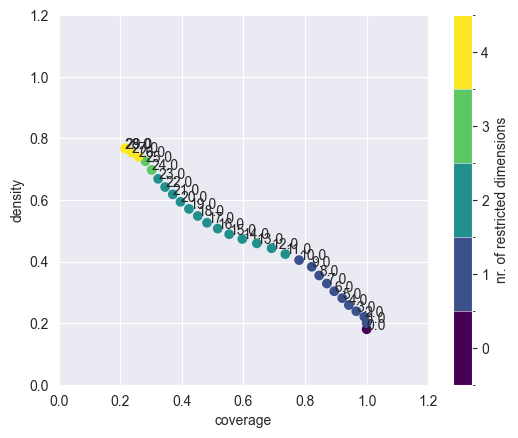

In [17]:
x = experiments_unc

y = ((df_feature_importance_out["A.5_Expected Number of Deaths"] > list(np.sort(df_feature_importance_out["A.5_Expected Number of Deaths"]))[np.int64(0.80* len(df_feature_importance_out["A.5_Expected Number of Deaths"]))])
    |(df_feature_importance_out['A.5_Expected Annual Damage'] > list(np.sort(df_feature_importance_out['A.5_Expected Annual Damage']))[np.int64(0.80* len(df_feature_importance_out['A.5_Expected Annual Damage']))])
     )

prim_alg = prim.Prim(x, y, threshold=0.75,peel_alpha=0.1)
box1 = prim_alg.find_box()
box1.show_tradeoff(annotated=True)
plt.show()

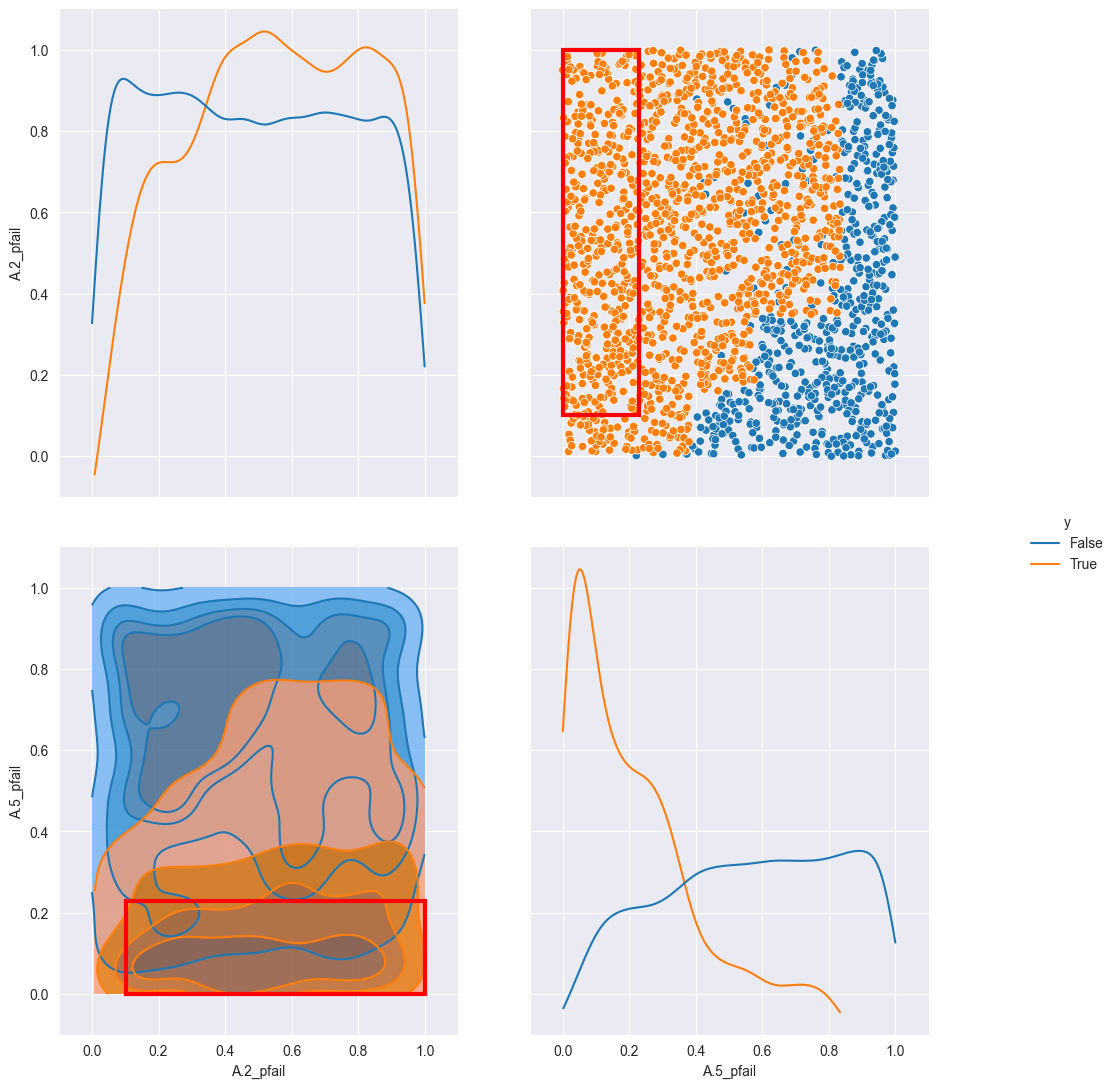

In [51]:
box1.select(15)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [ ]:
box1.inspect(15)
box1.inspect(15, style="graph")
plt.show()  

In [ ]:
pd.DataFrame(box1.inspect(0, style='data')[0][1]).to_csv('data\para_space_A5.csv')

### PRIM for general outcomes 

In [54]:
np.sort(df_feature_importance_out["Expected Number of Deaths"])

array([0.        , 0.        , 0.        , ..., 2.1654545 , 2.22286353,
       2.29544392])

In [61]:
len(df_feature_importance_out['Expected Number of Deaths']>list(np.sort(df_feature_importance_out["Expected Number of Deaths"]))[np.int64(0.8* len(df_feature_importance_out['Expected Number of Deaths']))])

20000

In [63]:
sum(df_feature_importance_out['Expected Number of Deaths']>list(np.sort(df_feature_importance_out["Expected Number of Deaths"]))[np.int64(0.8* len(df_feature_importance_out['Expected Number of Deaths']))])

3989

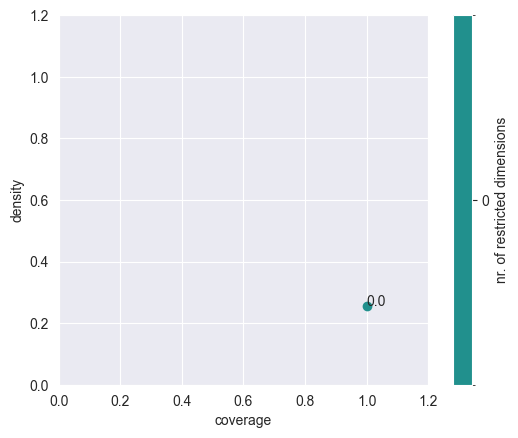

In [65]:
y = (
    (df_feature_importance_out['Expected Number of Deaths'] > list(np.sort(df_feature_importance_out["Expected Number of Deaths"]))[np.int64(0.8* len(df_feature_importance_out['Expected Number of Deaths']))])
     |(df_feature_importance_out['Expected Annual Damage'] > list(np.sort(df_feature_importance_out["Expected Annual Damage"]))[np.int64(0.8* len(df_feature_importance_out['Expected Annual Damage']))])
     )
# (df_feature_importance_out["Total Costs"] >= list(np.sort(df_feature_importance_out["Total Costs"]))[int(0.80* len(df_feature_importance_out["Total Costs"]))]) 
#      |
prim_alg = prim.Prim(x, y, threshold=0.8,peel_alpha=0.1)
box2 = prim_alg.find_box()
box2.show_tradeoff(annotated=True)
plt.show()

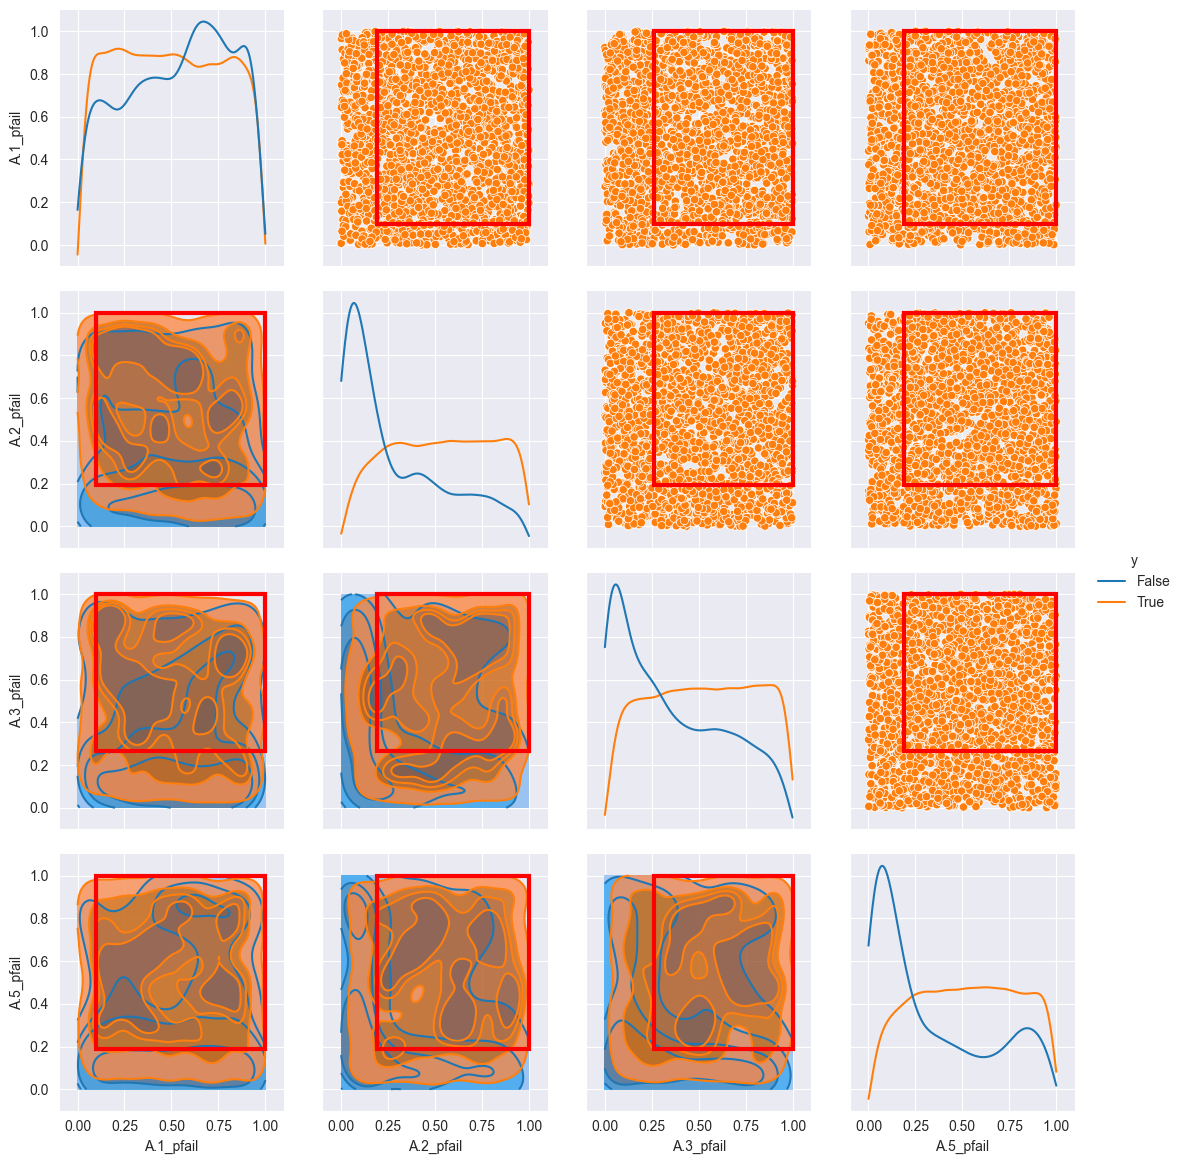

In [56]:
box2.select(8)
box2.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [ ]:
box2.inspect(15)
box2.inspect(15, style="graph")
plt.show()

In [67]:
pd.DataFrame(box2.inspect(13, style='data')[0][1]).to_csv('data\para_space_all.csv')

IndexError: single positional indexer is out-of-bounds

### Selection reference scenarios

In [66]:
from Convience_fun import create_scenario

In [ ]:
import multirange as mr

df_param_space_A5 = pd.read_csv('data/para_space_A5.csv').drop(0).rename(columns={"Unnamed: 0": "Variable"})
df_param_space_all = pd.read_csv('data/para_space_all.csv').drop(0).rename(columns={"Unnamed: 0": "Variable"})

dike_model, planning_steps = get_model_for_problem_formulation(3)


def create_scenario_from_box(all, a5):
    para_list = []
    for uncertainty in dike_model.uncertainties:
        # print((variable in df_param_space_A5.Variable))
        variable = uncertainty.name
        # print(variable)
        if (variable in list(df_param_space_A5.Variable)) & (variable in list(df_param_space_all.Variable)) & (
                all + a5 == 2):
            min_1 = float(
                df_param_space_A5[df_param_space_A5['Variable'] == variable][df_param_space_A5.columns[1]].values[
                    0]) * 10000
            max_1 = float(
                df_param_space_A5[df_param_space_A5['Variable'] == variable][df_param_space_A5.columns[2]].values[
                    0]) * 10000

            min_2 = float(
                df_param_space_all[df_param_space_all['Variable'] == variable][df_param_space_all.columns[1]].values[
                    0]) * 10000
            max_2 = float(
                df_param_space_all[df_param_space_all['Variable'] == variable][df_param_space_all.columns[2]].values[
                    0]) * 10000

            boundaries = mr.overlap(range(int(min_1), int(max_1)), range(int(min_2), int(max_2)))
            para_list.append((boundaries.start + (boundaries.stop - boundaries.start) / 2) / 10000)
            print((boundaries.start + (boundaries.stop - boundaries.start) / 2) / 10000)
        elif (variable in list(df_param_space_A5.Variable)) & (a5 == True):
            min_1 = float(
                df_param_space_A5[df_param_space_A5['Variable'] == variable][df_param_space_A5.columns[1]].values[0])
            max_1 = float(
                df_param_space_A5[df_param_space_A5['Variable'] == variable][df_param_space_A5.columns[2]].values[0])

            para_list.append((min_1 + (max_1 - min_1) / 2))
        elif (variable in list(df_param_space_all.Variable)) & (all == True):
            min_2 = float(
                df_param_space_all[df_param_space_all['Variable'] == variable][df_param_space_all.columns[1]].values[0])
            max_2 = float(
                df_param_space_all[df_param_space_all['Variable'] == variable][df_param_space_all.columns[2]].values[0])

            para_list.append((min_2 + (max_2 - min_2) / 2))
        elif variable.startswith("d"):
            para_list.append(3.5)
        elif variable == "A.0_ID flood wave shape":
            para_list.append(17)
        elif variable.endswith("Brate"):
            para_list.append(1.5)
        else:
            para_list.append((uncertainty.lower_bound + (uncertainty.upper_bound - uncertainty.lower_bound) / 2))

    return create_scenario(para_list)


Scenarios_MOEA = [create_scenario_from_box(all=True, a5=True), create_scenario_from_box(all=True, a5=False),
                  create_scenario_from_box(all=False, a5=True)]

In [ ]:
import pickle

In [ ]:
with open("data\ScenariosOpenExplo", 'wb') as file:
    pickle.dump(Scenarios_MOEA, file) 

